Playground to explore a threshold-based approach for sequence prediction (`generate_submission.py` uses this approach)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test_frame_X = pd.read_csv('train_crops.csv').set_index('video_id')
test_frame_X0 = pd.read_csv('train_crops_fishnet_046_0.0009.csv').set_index('video_id')
test_frame_X.columns

Index([u'row_id', u'frame', u'length', u'species_fourspot',
       u'species_grey sole', u'species_other', u'species_plaice',
       u'species_summer', u'species_windowpane', u'species_winter',
       u'species_no_fish'],
      dtype='object')

In [3]:
submission_frame = pd.DataFrame(test_frame_X)

In [4]:
fish_species = [u'species_fourspot', u'species_grey sole',
       u'species_other', u'species_plaice', u'species_summer',
       u'species_windowpane', u'species_winter']
all_species = fish_species + [u'species_no_fish']

def remove_species_no_fish(probs, threshold=0.98):
    fish_probs = np.expand_dims(np.sum(probs[probs[:,7] <= threshold,:7], axis=1), axis=1)
    probs[probs[:,7] <= threshold, :7] /= fish_probs

    # remove probs when no fish
    probs[probs[:,7] > threshold, :7] = np.nan 
    return probs

submission_frame[all_species]=remove_species_no_fish(test_frame_X[all_species].values)

submission_frame = submission_frame.drop(u'species_no_fish', axis=1)


In [5]:
vid_id = '0QAlqRiUad7xcB9k'

f = test_frame_X.loc[vid_id]['species_no_fish'].values
c = test_frame_X.loc[vid_id][[u'species_fourspot', u'species_grey sole',
       u'species_other', u'species_plaice', u'species_summer',
       u'species_windowpane', u'species_winter', 'species_no_fish']].values
cs = np.argmax(c, axis=1)

f0 = test_frame_X0.loc[vid_id]['species_no_fish'].values
c0 = test_frame_X0.loc[vid_id][[u'species_fourspot', u'species_grey sole',
       u'species_other', u'species_plaice', u'species_summer',
       u'species_windowpane', u'species_winter', 'species_no_fish']].values
cs0 = np.argmax(c0, axis=1)


#c = np.argmax(c, axis=1)

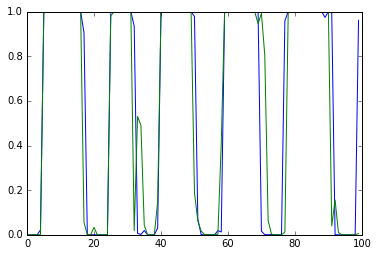

In [6]:
plt.plot(f[:100])
plt.plot(f0[:100])



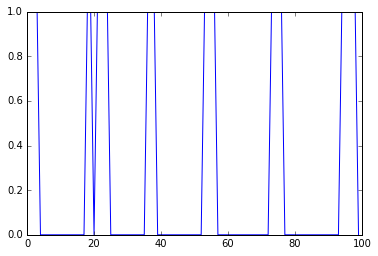

In [7]:
ff = np.bitwise_and((f < 0.01), (f0 < 0.01))
plt.plot(ff[:100])


In [8]:
def rle(inarray):
        """ run length encoding. Partial credit to R rle function. 
            Multi datatype arrays catered for including non Numpy
            returns: tuple (runlengths, startpositions, values) """
        ia = np.array(inarray)                  # force numpy
        n = len(ia)
        if n == 0: 
            return (None, None, None)
        else:
            y = np.array(ia[1:] != ia[:-1])     # pairwise unequal (string safe)
            i = np.append(np.where(y), n - 1)   # must include last element posi
            z = np.diff(np.append(-1, i))       # run lengths
            p = np.cumsum(np.append(0, z))[:-1] # positions
            return(z, p, ia[i])

In [9]:
l, s, v = rle(ff)
print(l,s,v)
print(ff)

(array([  4,  14,   2,   1,   4,  11,   3,  14,   4,  16,   4,  17,   5,
        13,   8,  16,   7,  17,   7,  16,  12,  29,   4,   1,   1,   2,
         4,  13,   4,  15,   6,  16,   5,  20,   4, 129,   4,  12,   3,
        17,   8,  13,   4,  12,   4,  15,   4,   9,   8,  13,   7,  11,
         8,  15,   6,  12,   4,  16,   4,  18,   5,  11,   1,  27,   1,
         4,   9,  10,   6,  14,   5,  13,   4,  15,   9,  18,   4,  13,
         4,  18,   4,  12,   6,  16,   3,  14,   7,  14,   5,   8,   1,
         3,   1,   1,   4,  16,   4, 110,   5,  16,   3,   1,   8,  12,
         7,  14,   9,  17,   4,  13,   4,  14,  11,  31,   5,  15,   4,
        11,   7,  15,   4,  12,   1,   1,   3,  12,   8,  16,   4,  15,
         3,   2]), array([   0,    4,   18,   20,   21,   25,   36,   39,   53,   57,   73,
         77,   94,   99,  112,  120,  136,  143,  160,  167,  183,  195,
        224,  228,  229,  230,  232,  236,  249,  253,  268,  274,  290,
        295,  315,  319,  448,  452,  464

In [10]:
s[v]

array([   0,   18,   21,   36,   53,   73,   94,  112,  136,  160,  183,
        224,  229,  232,  249,  268,  290,  315,  448,  464,  484,  505,
        521,  540,  553,  574,  592,  615,  633,  653,  675,  691,  719,
        724,  743,  763,  781,  800,  827,  844,  866,  882,  904,  921,
        942,  955,  959,  961,  981, 1095, 1116, 1120, 1140, 1161, 1187,
       1204, 1222, 1264, 1284, 1299, 1321, 1337, 1339, 1354, 1378, 1397])

In [11]:
l[v]


array([ 4,  2,  4,  3,  4,  4,  5,  8,  7,  7, 12,  4,  1,  4,  4,  6,  5,
        4,  4,  3,  8,  4,  4,  4,  8,  7,  8,  6,  4,  4,  5,  1,  1,  9,
        6,  5,  4,  9,  4,  4,  4,  6,  3,  7,  5,  1,  1,  4,  4,  5,  3,
        8,  7,  9,  4,  4, 11,  5,  4,  7,  4,  1,  3,  8,  4,  3])

In [12]:
MIN_LEN = 3
MIN_GAP = 10

offsets = s[v & (l >= MIN_LEN)]
if offsets[0] != 0:
    offsets = np.hstack(([0], offsets))
assert offsets[0] == 0
gaps = np.diff(offsets)
#print(offsets)
print(gaps)
filtered_offsets = np.hstack((offsets[0], offsets[1:][gaps > MIN_GAP]))
print(offsets, filtered_offsets)
print(offsets.shape, filtered_offsets.shape)

frame_offsets = filtered_offsets
print(frame_offsets, frame_offsets.shape)

[ 21  15  17  20  21  18  24  24  23  41   8  17  19  22  25 133  16  20
  21  16  19  13  21  18  23  18  20  22  49  19  20  18  19  27  17  22
  16  22  17  21  19  20 114  21   4  20  21  26  17  18  42  20  15  22
  18  15  24  19]
(array([   0,   21,   36,   53,   73,   94,  112,  136,  160,  183,  224,
        232,  249,  268,  290,  315,  448,  464,  484,  505,  521,  540,
        553,  574,  592,  615,  633,  653,  675,  724,  743,  763,  781,
        800,  827,  844,  866,  882,  904,  921,  942,  961,  981, 1095,
       1116, 1120, 1140, 1161, 1187, 1204, 1222, 1264, 1284, 1299, 1321,
       1339, 1354, 1378, 1397]), array([   0,   21,   36,   53,   73,   94,  112,  136,  160,  183,  224,
        249,  268,  290,  315,  448,  464,  484,  505,  521,  540,  553,
        574,  592,  615,  633,  653,  675,  724,  743,  763,  781,  800,
        827,  844,  866,  882,  904,  921,  942,  961,  981, 1095, 1116,
       1140, 1161, 1187, 1204, 1222, 1264, 1284, 1299, 1321, 1339, 1354,

In [13]:
fish_frames = []
for frame_offset in frame_offsets:
    min_len = MIN_LEN if frame_offset != 0 else 1
    offset_range = range(frame_offset,frame_offset+min_len)
    species = (cs[offset_range])
    if True: #np.unique(species).size <= 1:
        print(c[offset_range,species])
        frame_align_max_pred = (np.argmax(c[offset_range, species]))
        fish_frames.append(frame_offset+frame_align_max_pred)
    else:
        print("FILTERED", offset_range)
        print(c[offset_range])
print(fish_frames, len(fish_frames))

[ 1.]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 0.99999558  1.          1.        ]
[ 0.99986241  0.99999982  0.99999992]
[ 0.99999988  0.99999999  1.        ]
[ 0.99999834  0.99999999  1.        ]
[ 0.99999999  0.99999996  0.99999722]
[ 0.99999994  0.99999999  0.99999997]
[ 0.99999904  0.99999917  0.99999998]
[ 0.99999537  0.99999981  0.99999999]
[ 1.          1.          0.99999999]
[ 0.99999999  0.99999974  1.        ]
[ 0.99996832  0.99999997  0.99999991]
[ 0.99999992  0.99999999  0.99999991]
[ 1.  1.  1.]
[ 1.  1.  1.]
[ 0.99999848  0.99999946  0.99999964]
[ 0.9999999   0.99999999  0.9999999 ]
[ 0.99999999  0.99999999  0.99999998]
[ 0.99999993  1.          0.99999999]
[ 0.99999993  0.99999996  0.99999999]
[ 0.99997845  0.99999542  0.99991715]
[ 0.9999996   0.99999999  0.99999936]
[ 1.          1.          0.99999884]
[ 0.99999955  1.          1.        ]
[ 0.99999996  0.99999996  0.99999999]
[ 0.99999992  0.99999999  0.99999989]
[ 0.99999346  0.9999999   0.99999905]
[ 1.  1.  1.]
[ 0.9999995 

In [14]:

fish_number = np.zeros(submission_frame.loc[vid_id]['frame'].size, dtype=np.float32)
current_fish = 0
for it in range(fish_number.size):
    if it in fish_frames:
        current_fish += 1
    fish_number[it] = current_fish

submission_frame.loc[vid_id,'fish_number']=fish_number
submission_frame.loc[vid_id]

,row_id,frame,length,species_fourspot,species_grey sole,species_other,species_plaice,species_summer,species_windowpane,species_winter,fish_number
video_id,,,,,,,,,,,
0QAlqRiUad7xcB9k,9506,0,226.801193,1.767938e-13,8.847836e-13,2.423258e-11,2.165536e-13,1.213047e-09,1.000000,2.203386e-11,1.0
0QAlqRiUad7xcB9k,9507,1,219.865234,7.581536e-13,1.210194e-12,8.060400e-12,1.226541e-13,6.327089e-09,1.000000,4.616269e-11,1.0
0QAlqRiUad7xcB9k,9508,2,229.486359,1.656351e-13,9.002610e-13,1.782346e-11,5.708301e-13,3.252523e-09,1.000000,2.479357e-11,1.0
0QAlqRiUad7xcB9k,9509,3,232.750702,8.041796e-14,1.198645e-13,7.071262e-12,1.384160e-13,5.469616e-09,1.000000,4.579035e-11,1.0
0QAlqRiUad7xcB9k,9510,4,208.971344,1.339395e-03,4.387352e-06,7.187174e-06,8.597923e-07,1.444514e-04,0.998482,2.214399e-05,1.0
0QAlqRiUad7xcB9k,9511,5,154.542694,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0QAlqRiUad7xcB9k,9512,6,146.507568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0QAlqRiUad7xcB9k,9513,7,147.361847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
0QAlqRiUad7xcB9k,9514,8,155.755722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [62]:
test_mismatch = [
    ('00WK7DR6FyPZ5u3A', 3), 
    ('bc6hkwua3iLReunk', 1),
    ('8jkQWJWPCtIvcnmH', 1),
#    ('tJinkrdMMZ477RGi', -3), # 426 427 428 
    ('P3QkoeOjxoM6pDKb', 172),
    ('pGd0FSJQcDH5DI8x', 1),
    ('Sw0AgnH8BY1BDGHu', 1),
    ('ZU6XtvFk0UMrHLEL', 1),
    ('LU2DSX6VZcIsiyaW', 1)]

In [71]:
submission_frame = submission_frame.reset_index().drop('row_id', 1).set_index(['video_id', 'frame'])
#submission_frame = submission_frame.drop([('00WK7DR6FyPZ5u3A', 0), ('00WK7DR6FyPZ5u3A', 1)])

#submission_frame = submission_frame.drop([('tJinkrdMMZ477RGi', 426), ('tJinkrdMMZ477RGi', 426), ('tJinkrdMMZ477RGi', 426)])
for m_vid, m_frame in test_mismatch:
    last_frame =len(submission_frame.loc[m_vid])
    print(last_frame)
    for frame_to_add in range(last_frame, last_frame+m_frame):
        submission_frame.loc[(m_vid, frame_to_add), :] = 1
    print(submission_frame)
submission_frame.loc[('00WK7DR6FyPZ5u3A', 0), :] = 1
ss#ss.index[0:1]
#ss.drop(('zxjr6V8bFiFHxpNU', 600:672))



ValueError: labels ['row_id'] not contained in axis

In [17]:
submission_frame=submission_frame.reset_index()
submission_frame=submission_frame[['row_id','frame','video_id', 'fish_number','length','species_fourspot','species_grey sole','species_other','species_plaice','species_summer','species_windowpane','species_winter']]
submission_frame=submission_frame.set_index('row_id')

In [18]:
submission_frame

,frame,video_id,fish_number,length,species_fourspot,species_grey sole,species_other,species_plaice,species_summer,species_windowpane,species_winter
row_id,,,,,,,,,,,
0,0,00WK7DR6FyPZ5u3A,NaN,157.631805,1.765322e-09,9.999996e-01,3.660148e-08,3.120462e-07,2.361619e-08,5.919358e-08,1.371276e-08
1,1,00WK7DR6FyPZ5u3A,NaN,162.672363,1.240667e-10,9.999999e-01,2.648932e-09,1.154697e-07,9.599542e-10,4.391315e-09,5.575055e-10
2,2,00WK7DR6FyPZ5u3A,NaN,155.637497,8.897231e-10,9.999971e-01,1.414423e-06,1.305165e-06,1.158667e-08,8.389073e-08,3.659389e-08
3,3,00WK7DR6FyPZ5u3A,NaN,171.657013,5.965574e-10,9.999968e-01,3.290797e-07,2.809475e-06,5.564643e-10,3.567773e-08,7.221695e-09
4,4,00WK7DR6FyPZ5u3A,NaN,140.329041,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,00WK7DR6FyPZ5u3A,NaN,142.927780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,00WK7DR6FyPZ5u3A,NaN,132.273026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,00WK7DR6FyPZ5u3A,NaN,132.524872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,00WK7DR6FyPZ5u3A,NaN,134.515686,NaN,NaN,NaN,NaN,NaN,NaN,NaN
